# Task 1

# Project Name - Iris Flower Classification

#### Project Type - Classification
#### Industry - Oasis Infobyte
#### Contribution - Individual
#### Member Name - Pruthvi Javir

### Project Summary  -

### Product Description : 

- The Iris Flower Classification project focuses on developing a machine learning model to classify iris flowers into their respective species based on specific measurements.

- Iris flowers are classified into three species: setosa, versicolor, and virginica, each of which exhibits distinct characteristics in terms of measurements.

### Objective:

- The primary goal of this project is to leverage machine learning techniques to build a classification model that can accurately identify the species of iris flowers based on their measurements. 

- The model aims to automate the classification process, offering a practical solution for identifying iris species.

### Project Details : 

- Iris flowers have three species: setosa, versicolor, and virginica.
- These species can be distinguished based on measurements such as sepal length, sepal width, petal length, and petal width.
- The project involves training a machine learning model on a dataset that contains iris flower measurements associated with their respective species.
- The trained model will classify iris flowers into one of the three species based on their measurements.

### GitHub Link :

GitHub Link - https://github.com/Pruthvijavir/Oasis-Infobyte

## 1. Problem Statement

- The iris flower, scientifically known as Iris, is a distinctive genus of flowering plants. Within this genus, there are three primary species: Iris setosa, Iris versicolor, and Iris virginica.

- These species exhibit variations in their physical characteristics, particularly in the measurements of their sepal length, sepal width, petal length, and petal width.

### Lets Begin --> Import Libraries

Importing Numpy & Pandas for data processing & data wrangling

In [1]:
import numpy as np
import pandas as pd

Importing  tools for visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Import evaluation metric libraries

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

Library used for data preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder

Import model selection libraries

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

Library used for ML Model implementation

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

Library used for ignore warnings

In [7]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [8]:
df = pd.read_csv("iris.csv")

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset Rows & Columns count

In [10]:
df.shape

(150, 6)

### Dataset Information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Duplicate Values

In [12]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


### Missing Values/Null Values

In [13]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## 2. Understanding The Variables

In [14]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [15]:
df.describe(include= 'all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


### Check Unique Values for each variable

In [16]:
for i in df.columns.tolist():
    print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


## 3. Data Wrangling

In [17]:
data=df.iloc[:,1:]

In [18]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


manipulations ---> Only drop the first column of the dataset.

## 4. Data Vizualization, Storytelling & Experimenting with charts : 

#### Understand the relationships between variables 

### Chart - 1 : Distribution of Numerical Variables

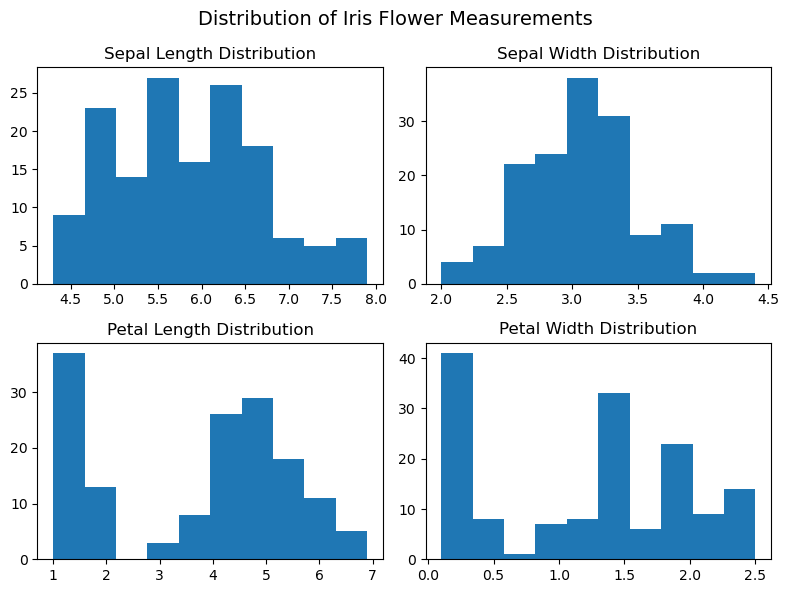

In [24]:
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

### Chart - 2 : Sepal Length vs Sepal Width

In [25]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

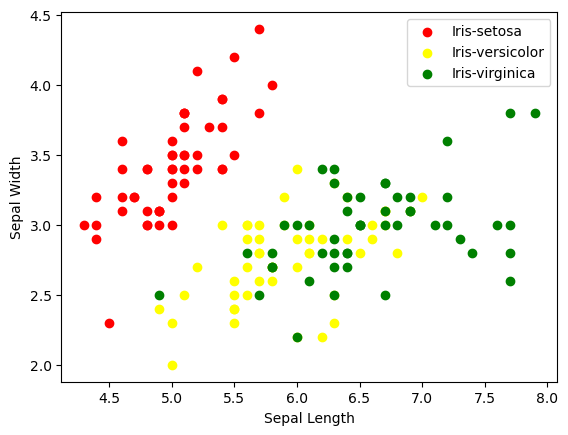

In [26]:
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

### Chart - 3 : Petal Length vs Petal Width

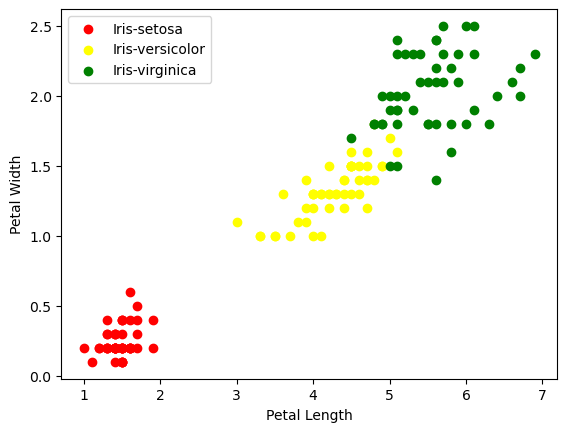

In [27]:
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

### Chart - 4 : Sepal Length vs Petal Length

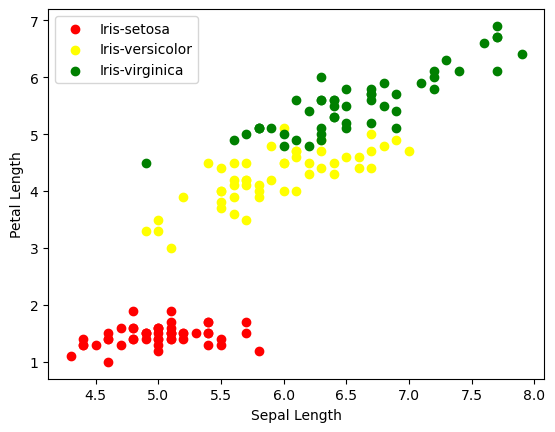

In [28]:
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

### Chart - 5 : Sepal Width vs Petal Width

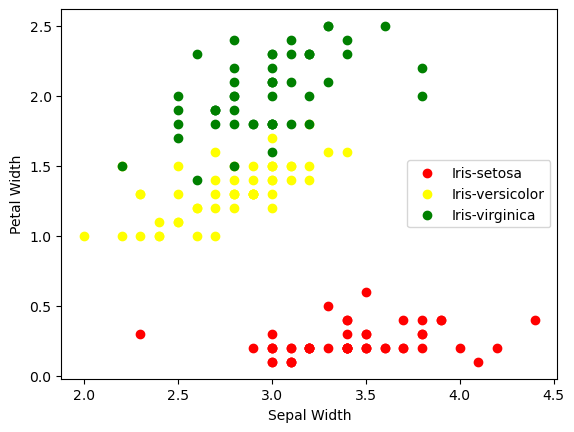

In [29]:
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

### Chart - 6 : Correlation Heatmap

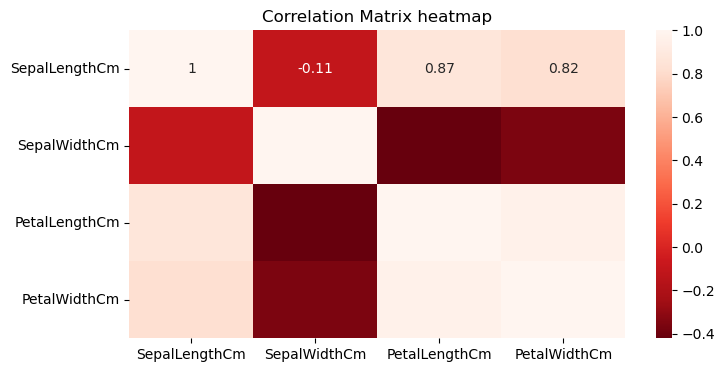

In [30]:
corr_matrix = data.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

## 5. Feature Engineering & Data Pre-processing

### Categorical Encoding

In [31]:
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
data['Species'] = le.fit_transform(data['Species'])

# Check the unique values in the 'Species' column after encoding
unique_species = data['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


### Data Scaling

In [32]:
x=data.drop(columns=['Species'], axis=1)
y=data['Species']

### Data Splitting

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [34]:
y_train.value_counts()

2    37
1    36
0    32
Name: Species, dtype: int64

## 6. ML Model Implementation

In [35]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [36]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])# Create a score dataframe

## ML Model - 1 : Logistic regression

In [37]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)


Confusion Matrix:


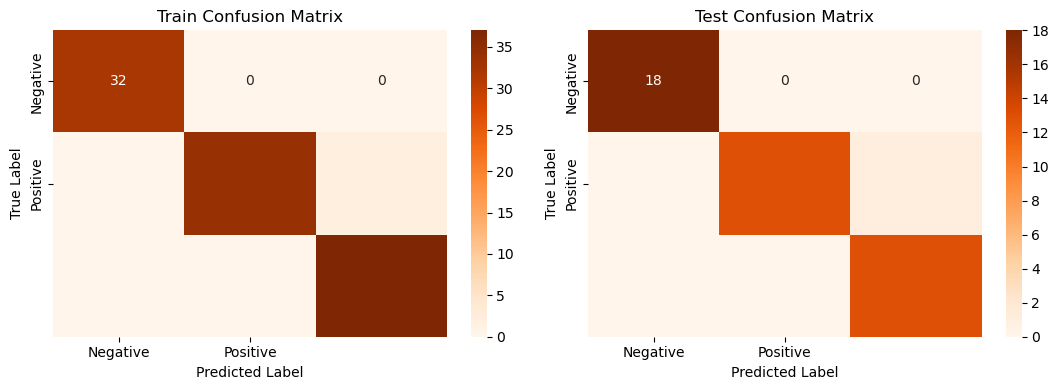


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  32        |
| 1            |    1        | 0.944444 |   0.971429 |  36        |
| 2            |    0.948718 | 1        |   0.973684 |  37        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.982906 | 0.981481 |   0.981704 | 105        |
| weighted avg |    0.981929 | 0.980952 |   0.980931 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 18        |
| 1            |    1        | 0.928571 |   0.962963 | 14        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [38]:
# Visualizing evaluation Metric Score chart

lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [39]:
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.981929
Precision Test,0.979365
Recall Train,0.980952
Recall Test,0.977778
Accuracy Train,0.980952
Accuracy Test,0.977778
F1 macro Train,0.980931
F1 macro Test,0.977778


### Cross- Validation & Hyperparameter Tuning

In [40]:
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'sag'}


In [41]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


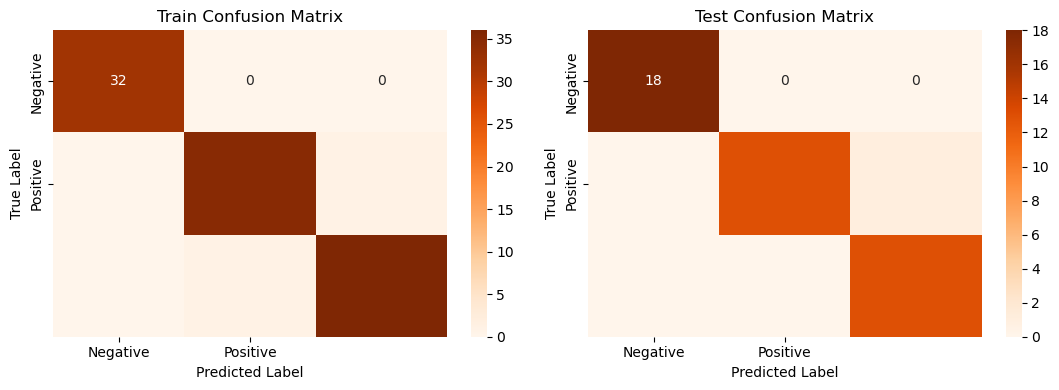


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  32        |
| 1            |    0.972222 | 0.972222 |   0.972222 |  36        |
| 2            |    0.972973 | 0.972973 |   0.972973 |  37        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.981732 | 0.981732 |   0.981732 | 105        |
| weighted avg |    0.980952 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 18        |
| 1            |    1        | 0.928571 |   0.962963 | 14        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [42]:
# Visualizing evaluation Metric Score chart

lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [43]:
score['Logistic regression tuned'] = lr_score2

In [44]:
# Updated Evaluation metric Score Chart

score

,Logistic regression,Logistic regression tuned
Precision Train,0.981929,0.980952
Precision Test,0.979365,0.979365
Recall Train,0.980952,0.980952
Recall Test,0.977778,0.977778
Accuracy Train,0.980952,0.980952
Accuracy Test,0.977778,0.977778
F1 macro Train,0.980931,0.980952
F1 macro Test,0.977778,0.977778


#### It appears that hyperparameter tuning did not improve the performance of the Logistic Regression model on the test set.

#### The precision, recall, accuracy and F1 scores on the test set are same for both tuned and untuned Logistic Regression models.

## ML Model - 2 : Decision Tree

In [45]:
dt_model = DecisionTreeClassifier(random_state=20)


Confusion Matrix:


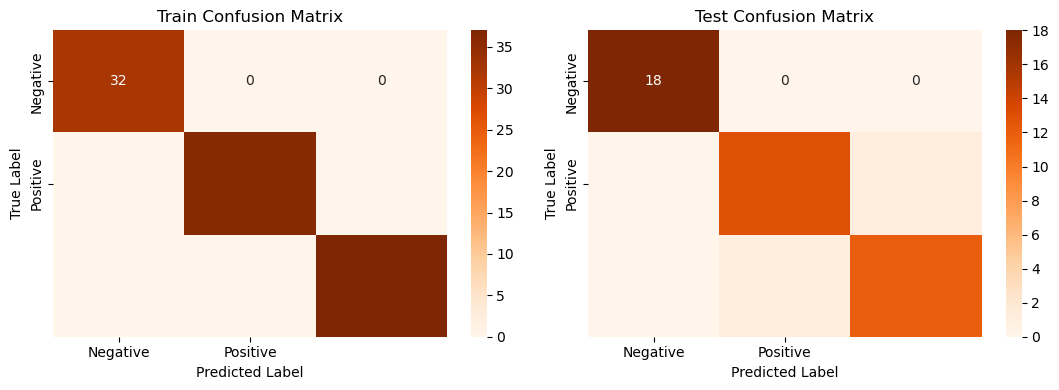


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        32 |
| 1            |           1 |        1 |          1 |        36 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 18        |
| 1            |    0.928571 | 0.928571 |   0.928571 | 14        |
| 2            |    0.923077 | 0.923077 |   0.923077 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [46]:
# Visualizing evaluation Metric Score chart

dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [47]:
# Updated Evaluation metric Score Chart

score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.981929,0.980952,1.000000
Precision Test,0.979365,0.979365,0.955556
Recall Train,0.980952,0.980952,1.000000
Recall Test,0.977778,0.977778,0.955556
Accuracy Train,0.980952,0.980952,1.000000
Accuracy Test,0.977778,0.977778,0.955556
F1 macro Train,0.980931,0.980952,1.000000
F1 macro Test,0.977778,0.977778,0.955556


### Cross- Validation & Hyperparameter Tuning

In [48]:
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [49]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Confusion Matrix:


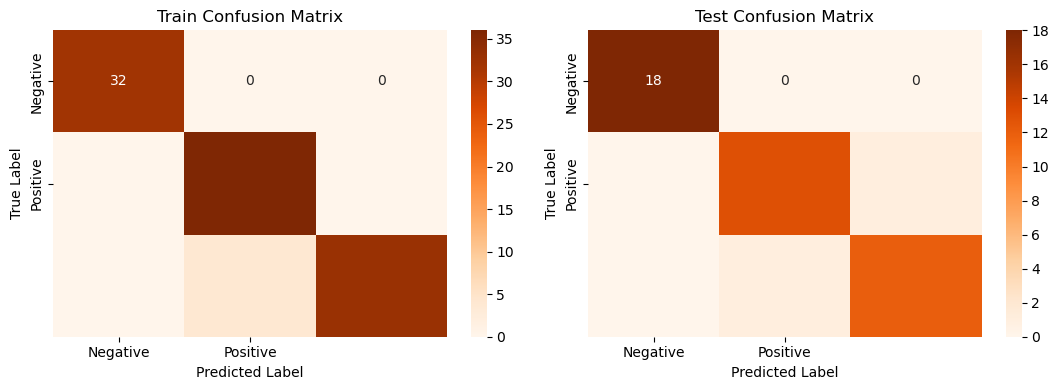


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  32        |
| 1            |    0.9      | 1        |   0.947368 |  36        |
| 2            |    1        | 0.891892 |   0.942857 |  37        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.966667 | 0.963964 |   0.963409 | 105        |
| weighted avg |    0.965714 | 0.961905 |   0.961819 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 18        |
| 1            |    0.928571 | 0.928571 |   0.928571 | 14        |
| 2            |    0.923077 | 0.923077 |   0.923077 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [50]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [51]:
# Updated Evaluation metric Score Chart

score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.981929,0.980952,1.000000
Precision Test,0.979365,0.979365,0.955556
Recall Train,0.980952,0.980952,1.000000
Recall Test,0.977778,0.977778,0.955556
Accuracy Train,0.980952,0.980952,1.000000
Accuracy Test,0.977778,0.977778,0.955556
F1 macro Train,0.980931,0.980952,1.000000
F1 macro Test,0.977778,0.977778,0.955556


#### It appears that hyperparameter tuning didn't improved the performance of the Decision Tree model on the test set. 

#### The precision, recall, accuracy and F1 scores on the test set are less for the tuned Decision Tree model compare to the untuned Decision Tree model.

#### The tuned model is not overfitting like the untuned model.

## ML Model - 3 : Random Forest

In [52]:
rf_model = RandomForestClassifier(random_state=0)


Confusion Matrix:


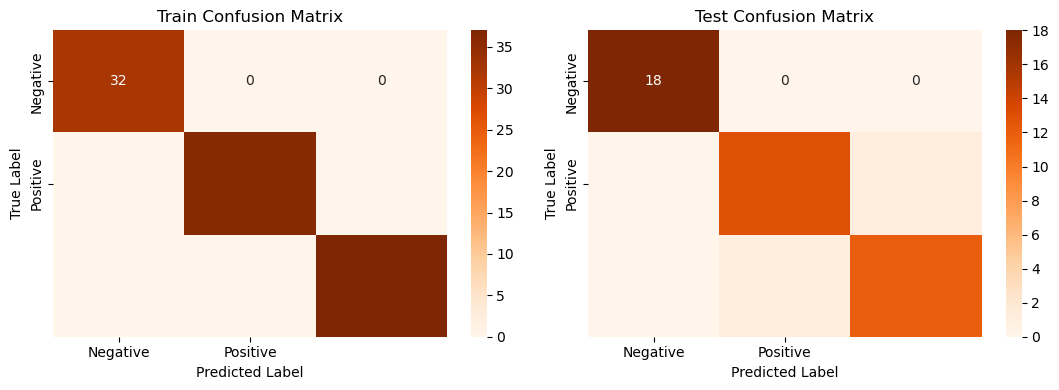


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        32 |
| 1            |           1 |        1 |          1 |        36 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 18        |
| 1            |    0.928571 | 0.928571 |   0.928571 | 14        |
| 2            |    0.923077 | 0.923077 |   0.923077 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [53]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [54]:
# Updated Evaluation metric Score Chart

score['Random Forest'] = rf_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest
Precision Train,0.981929,0.980952,1.000000,1.000000
Precision Test,0.979365,0.979365,0.955556,0.955556
Recall Train,0.980952,0.980952,1.000000,1.000000
Recall Test,0.977778,0.977778,0.955556,0.955556
Accuracy Train,0.980952,0.980952,1.000000,1.000000
Accuracy Test,0.977778,0.977778,0.955556,0.955556
F1 macro Train,0.980931,0.980952,1.000000,1.000000
F1 macro Test,0.977778,0.977778,0.955556,0.955556


### Cross- Validation & Hyperparameter Tuning

In [55]:
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 4, 'max_depth': 12}


In [56]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Confusion Matrix:


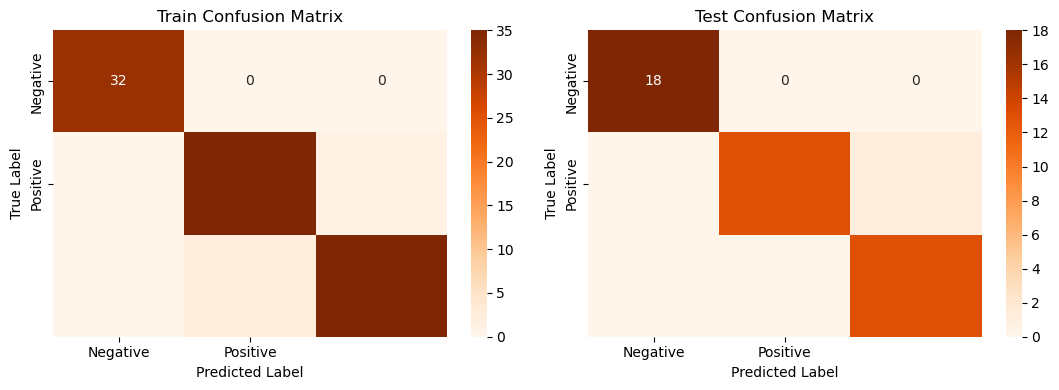


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  32        |
| 1            |    0.945946 | 0.972222 |   0.958904 |  36        |
| 2            |    0.972222 | 0.945946 |   0.958904 |  37        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.972723 | 0.972723 |   0.972603 | 105        |
| weighted avg |    0.971679 | 0.971429 |   0.971429 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 18        |
| 1            |    1        | 0.928571 |   0.962963 | 14        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [57]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [58]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest
Precision Train,0.981929,0.980952,1.000000,1.000000
Precision Test,0.979365,0.979365,0.955556,0.955556
Recall Train,0.980952,0.980952,1.000000,1.000000
Recall Test,0.977778,0.977778,0.955556,0.955556
Accuracy Train,0.980952,0.980952,1.000000,1.000000
Accuracy Test,0.977778,0.977778,0.955556,0.955556
F1 macro Train,0.980931,0.980952,1.000000,1.000000
F1 macro Test,0.977778,0.977778,0.955556,0.955556


#### It appears that hyperparameter tuning improved the performance of the Random Forest model on the train set. But the precision, recall, accuracy and F1 scores on the test set are same for both tuned and untuned Random Forest models.

## ML Model - 4 : SVM (Support Vector Machine)

In [59]:
svm_model = SVC(kernel='linear', random_state=0, probability=True)


Confusion Matrix:


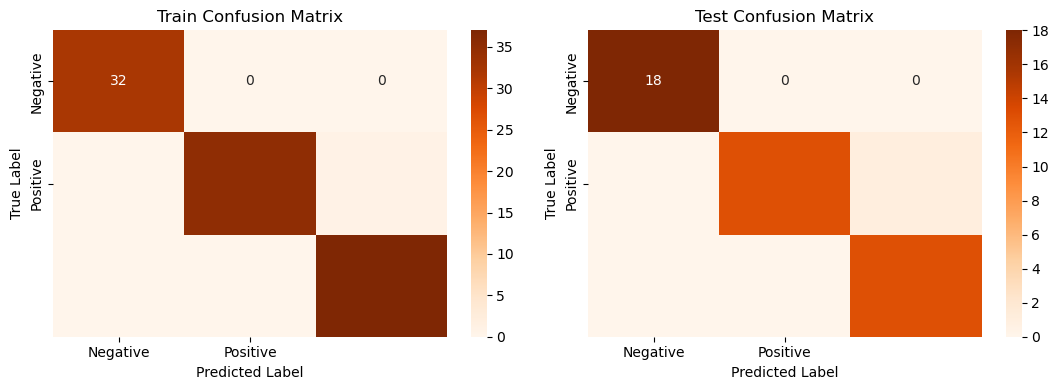


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  32        |
| 1            |    1        | 0.972222 |   0.985915 |  36        |
| 2            |    0.973684 | 1        |   0.986667 |  37        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.991228 | 0.990741 |   0.990861 | 105        |
| weighted avg |    0.990727 | 0.990476 |   0.990473 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 18        |
| 1            |    1        | 0.928571 |   0.962963 | 14        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [60]:
# Visualizing evaluation Metric Score chart

svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [61]:
# Updated Evaluation metric Score Chart

score['SVM'] = svm_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM
Precision Train,0.981929,0.980952,1.000000,1.000000,0.990727
Precision Test,0.979365,0.979365,0.955556,0.955556,0.979365
Recall Train,0.980952,0.980952,1.000000,1.000000,0.990476
Recall Test,0.977778,0.977778,0.955556,0.955556,0.977778
Accuracy Train,0.980952,0.980952,1.000000,1.000000,0.990476
Accuracy Test,0.977778,0.977778,0.955556,0.955556,0.977778
F1 macro Train,0.980931,0.980952,1.000000,1.000000,0.990473
F1 macro Test,0.977778,0.977778,0.955556,0.955556,0.977778


### Cross- Validation & Hyperparameter Tuning

In [62]:
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'rbf', 'degree': 5, 'C': 5.5}


In [63]:
# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Confusion Matrix:


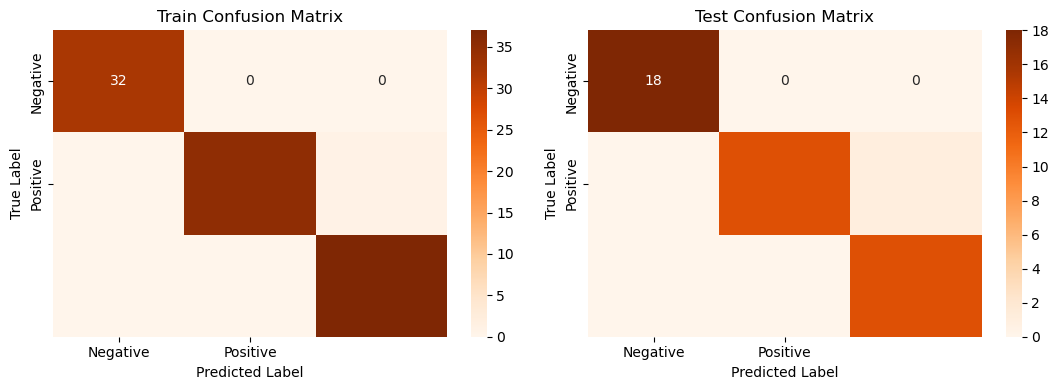


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  32        |
| 1            |    1        | 0.972222 |   0.985915 |  36        |
| 2            |    0.973684 | 1        |   0.986667 |  37        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.991228 | 0.990741 |   0.990861 | 105        |
| weighted avg |    0.990727 | 0.990476 |   0.990473 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 18        |
| 1            |    1        | 0.928571 |   0.962963 | 14        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [64]:
# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test)

In [65]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM
Precision Train,0.981929,0.980952,1.000000,1.000000,0.990727
Precision Test,0.979365,0.979365,0.955556,0.955556,0.979365
Recall Train,0.980952,0.980952,1.000000,1.000000,0.990476
Recall Test,0.977778,0.977778,0.955556,0.955556,0.977778
Accuracy Train,0.980952,0.980952,1.000000,1.000000,0.990476
Accuracy Test,0.977778,0.977778,0.955556,0.955556,0.977778
F1 macro Train,0.980931,0.980952,1.000000,1.000000,0.990473
F1 macro Test,0.977778,0.977778,0.955556,0.955556,0.977778


#### It appears that hyperparameter tuning did not improve the performance of the SVM model on the test set.

#### The precision, recall, accuracy and F1 scores on the test set are same for both tuned and untuned SVM models.

#### It appears that hyperparameter tuning did not improve the performance of the SVM model on the test set.

#### The precision, recall, accuracy and F1 scores on the test set are same for both tuned and untuned SVM models.

## ML Model - 5 : Xtreme Gradient Boosting

In [66]:
xgb_model = xgb.XGBClassifier()

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


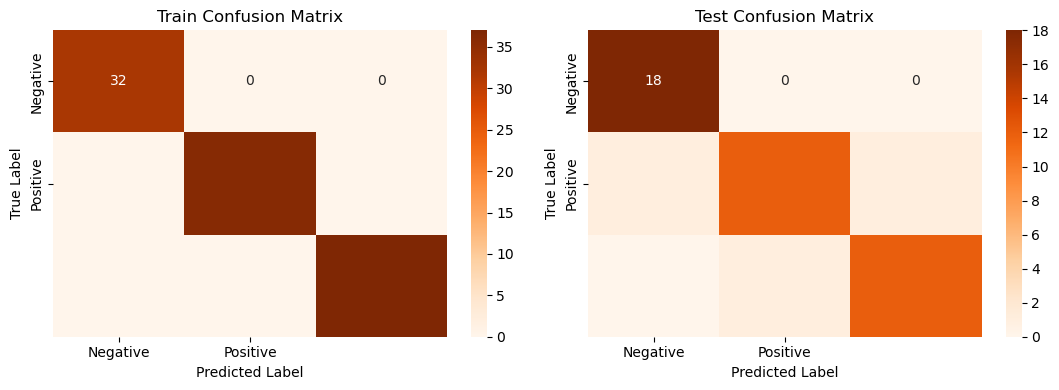


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        32 |
| 1            |           1 |        1 |          1 |        36 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.947368 | 1        |   0.972973 | 18        |
| 1            |    0.923077 | 0.857143 |   0.888889 | 14        |
| 2            |    0.923077 | 0.923077 |   0.923077 | 13        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

In [67]:
# Visualizing evaluation Metric Score chart

xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [68]:
# Updated Evaluation metric Score Chart

score['XGB'] = xgb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,XGB
Precision Train,0.981929,0.980952,1.000000,1.000000,0.990727,1.000000
Precision Test,0.979365,0.979365,0.955556,0.955556,0.979365,0.932794
Recall Train,0.980952,0.980952,1.000000,1.000000,0.990476,1.000000
Recall Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.933333
Accuracy Train,0.980952,0.980952,1.000000,1.000000,0.990476,1.000000
Accuracy Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.933333
F1 macro Train,0.980931,0.980952,1.000000,1.000000,0.990473,1.000000
F1 macro Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.932399


### Cross- Validation & Hyperparameter Tuning

In [69]:
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 160, 'max_depth': 10, 'learning_rate': 0.04}


In [70]:
# Initialize model with best parameters

xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Confusion Matrix:


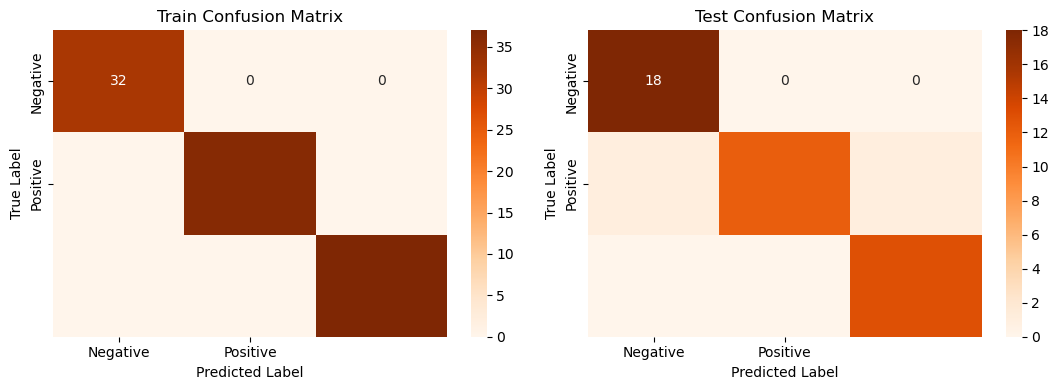


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        32 |
| 1            |           1 |        1 |          1 |        36 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.947368 | 1        |   0.972973 | 18        |
| 1            |    1        | 0.857143 |   0.923077 | 14        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [71]:
# Visualizing evaluation Metric Score chart

xgb2_score = evaluate_model(xgb_model2, x_train, x_test, y_train, y_test)

In [72]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,XGB
Precision Train,0.981929,0.980952,1.000000,1.000000,0.990727,1.000000
Precision Test,0.979365,0.979365,0.955556,0.955556,0.979365,0.932794
Recall Train,0.980952,0.980952,1.000000,1.000000,0.990476,1.000000
Recall Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.933333
Accuracy Train,0.980952,0.980952,1.000000,1.000000,0.990476,1.000000
Accuracy Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.933333
F1 macro Train,0.980931,0.980952,1.000000,1.000000,0.990473,1.000000
F1 macro Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.932399


#### It appears that hyperparameter tuning did not improve the performance of the XGBoost model on the test set. 

#### The precision, recall, accuracy and F1 scores on the test set are same for both the untuned and tuned XGBoost models

#### It appears that hyperparameter tuning did not improve the performance of the XGBoost model on the test set. 

#### The precision, recall, accuracy and F1 scores on the test set are same for both the untuned and tuned XGBoost models.

## ML Model - 6 : Naive Bayes

In [73]:
nb_model = GaussianNB()


Confusion Matrix:


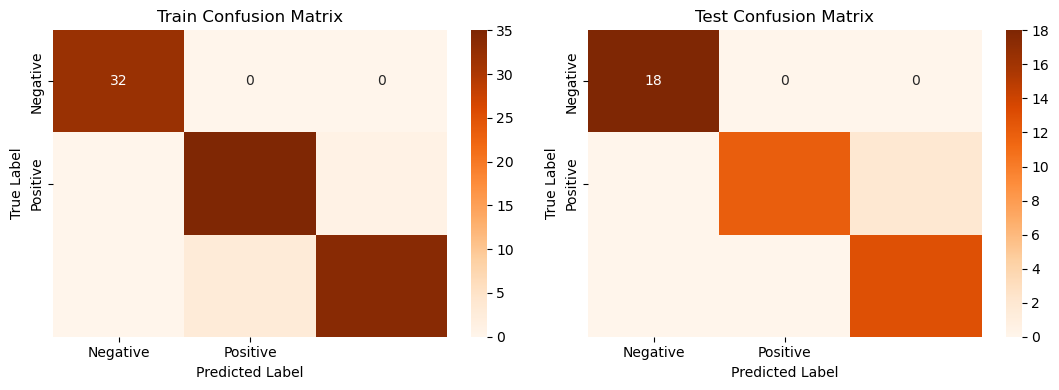


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  32        |
| 1            |    0.921053 | 0.972222 |   0.945946 |  36        |
| 2            |    0.971429 | 0.918919 |   0.944444 |  37        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.96416  | 0.963714 |   0.963463 | 105        |
| weighted avg |    0.962864 | 0.961905 |   0.96189  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 18        |
| 1            |    1        | 0.857143 |   0.923077 | 14        |
| 2            |    0.866667 | 1        |   0.928571 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [74]:
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [75]:
# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,XGB,Naive Bayes
Precision Train,0.981929,0.980952,1.000000,1.000000,0.990727,1.000000,0.962864
Precision Test,0.979365,0.979365,0.955556,0.955556,0.979365,0.932794,0.961481
Recall Train,0.980952,0.980952,1.000000,1.000000,0.990476,1.000000,0.961905
Recall Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.933333,0.955556
Accuracy Train,0.980952,0.980952,1.000000,1.000000,0.990476,1.000000,0.961905
Accuracy Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.933333,0.955556
F1 macro Train,0.980931,0.980952,1.000000,1.000000,0.990473,1.000000,0.961890
F1 macro Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.932399,0.955433


### Cross- Validation & Hyperparameter Tuning

In [76]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': 0.008111308307896872}


In [77]:
# Initiate model with best parameters

nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Confusion Matrix:


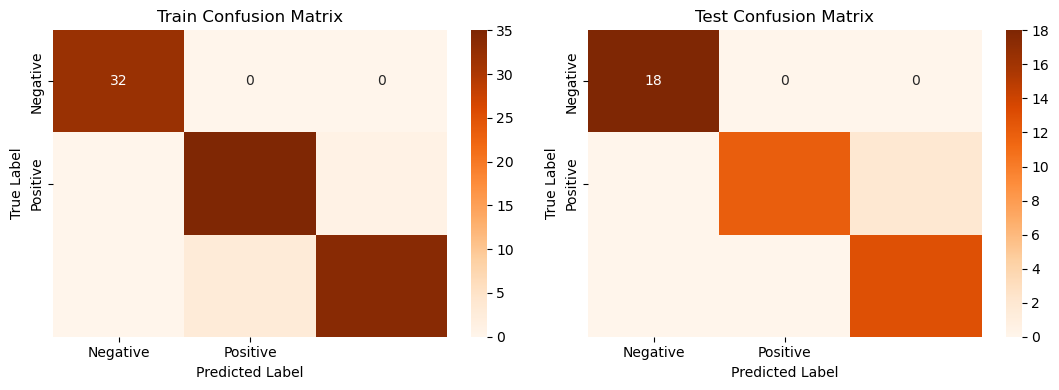


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  32        |
| 1            |    0.921053 | 0.972222 |   0.945946 |  36        |
| 2            |    0.971429 | 0.918919 |   0.944444 |  37        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.96416  | 0.963714 |   0.963463 | 105        |
| weighted avg |    0.962864 | 0.961905 |   0.96189  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 18        |
| 1            |    1        | 0.857143 |   0.923077 | 14        |
| 2            |    0.866667 | 1        |   0.928571 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [78]:
# Visualizing evaluation Metric Score chart

nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

In [79]:
score['Naive Bayes tuned']= nb2_score

In [80]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,XGB,Naive Bayes,Naive Bayes tuned
Precision Train,0.981929,0.980952,1.000000,1.000000,0.990727,1.000000,0.962864,0.962864
Precision Test,0.979365,0.979365,0.955556,0.955556,0.979365,0.932794,0.961481,0.961481
Recall Train,0.980952,0.980952,1.000000,1.000000,0.990476,1.000000,0.961905,0.961905
Recall Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.933333,0.955556,0.955556
Accuracy Train,0.980952,0.980952,1.000000,1.000000,0.990476,1.000000,0.961905,0.961905
Accuracy Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.933333,0.955556,0.955556
F1 macro Train,0.980931,0.980952,1.000000,1.000000,0.990473,1.000000,0.961890,0.961890
F1 macro Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.932399,0.955433,0.955433


#### It appears that hyperparameter tuning did not improved the performance of the Naive Bayes model on the test set.

#### The tuned Naive Bayes model has precision, recall, accuracy and F1 score on the test set as same as in the untuned Naive Bayes model.

## ML Model - 7 : Neural Network

In [82]:
nn_model = MLPClassifier(random_state=0)


Confusion Matrix:


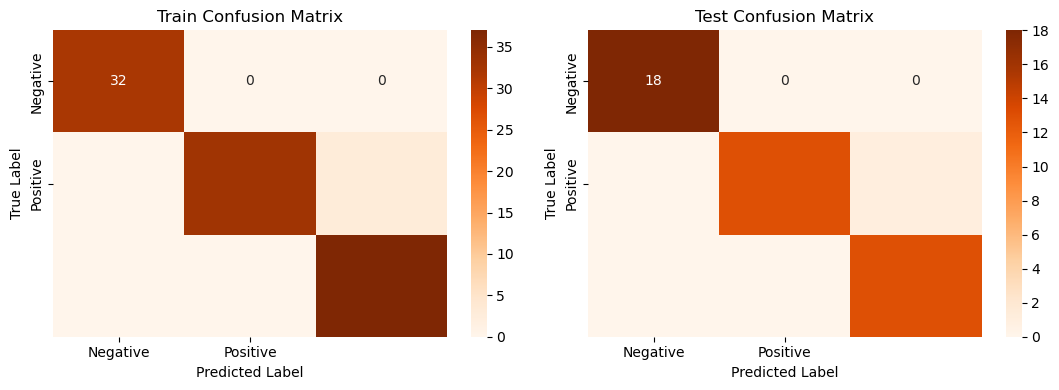


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  32        |
| 1            |    1        | 0.916667 |   0.956522 |  36        |
| 2            |    0.925    | 1        |   0.961039 |  37        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.975    | 0.972222 |   0.97252  | 105        |
| weighted avg |    0.973571 | 0.971429 |   0.971364 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 18        |
| 1            |    1        | 0.928571 |   0.962963 | 14        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [83]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [84]:
# Updated Evaluation metric Score Chart
score['Neural Network'] = neural_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,XGB,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.981929,0.980952,1.000000,1.000000,0.990727,1.000000,0.962864,0.962864,0.973571
Precision Test,0.979365,0.979365,0.955556,0.955556,0.979365,0.932794,0.961481,0.961481,0.979365
Recall Train,0.980952,0.980952,1.000000,1.000000,0.990476,1.000000,0.961905,0.961905,0.971429
Recall Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.933333,0.955556,0.955556,0.977778
Accuracy Train,0.980952,0.980952,1.000000,1.000000,0.990476,1.000000,0.961905,0.961905,0.971429
Accuracy Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.933333,0.955556,0.955556,0.977778
F1 macro Train,0.980931,0.980952,1.000000,1.000000,0.990473,1.000000,0.961890,0.961890,0.971364
F1 macro Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.932399,0.955433,0.955433,0.977778


### Cross- Validation & Hyperparameter Tuning

In [85]:
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'hidden_layer_sizes': 90, 'alpha': 0.0097}


In [86]:
# Initiate model with best parameters
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Confusion Matrix:


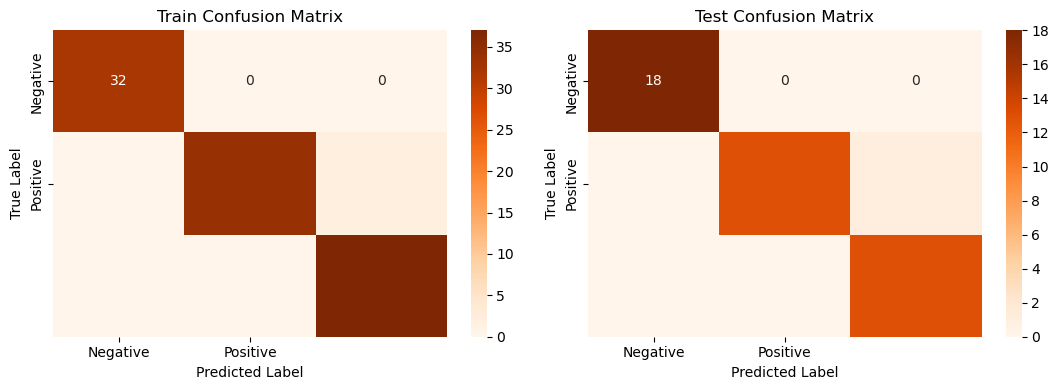


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  32        |
| 1            |    1        | 0.944444 |   0.971429 |  36        |
| 2            |    0.948718 | 1        |   0.973684 |  37        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.982906 | 0.981481 |   0.981704 | 105        |
| weighted avg |    0.981929 | 0.980952 |   0.980931 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 18        |
| 1            |    1        | 0.928571 |   0.962963 | 14        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [87]:
# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [88]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,XGB,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.981929,0.980952,1.000000,1.000000,0.990727,1.000000,0.962864,0.962864,0.973571
Precision Test,0.979365,0.979365,0.955556,0.955556,0.979365,0.932794,0.961481,0.961481,0.979365
Recall Train,0.980952,0.980952,1.000000,1.000000,0.990476,1.000000,0.961905,0.961905,0.971429
Recall Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.933333,0.955556,0.955556,0.977778
Accuracy Train,0.980952,0.980952,1.000000,1.000000,0.990476,1.000000,0.961905,0.961905,0.971429
Accuracy Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.933333,0.955556,0.955556,0.977778
F1 macro Train,0.980931,0.980952,1.000000,1.000000,0.990473,1.000000,0.961890,0.961890,0.971364
F1 macro Test,0.977778,0.977778,0.955556,0.955556,0.977778,0.932399,0.955433,0.955433,0.977778


#### It appears that hyperparameter tuning improve the performance of the neural network model on the test set. 

#### The precision, recall, accuracy and F1 scores on the test set are increased for the tuned neural network model compare to untuned neural network model.

In [92]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Random Forest |      SVM |      XGB |   Naive Bayes |   Naive Bayes tuned |   Neural Network |
|:----------------|----------------------:|----------------------------:|----------------:|----------------:|---------:|---------:|--------------:|--------------------:|-----------------:|
| Precision Train |              0.981929 |                    0.980952 |        1        |        1        | 0.990727 | 1        |      0.962864 |            0.962864 |         0.973571 |
| Precision Test  |              0.979365 |                    0.979365 |        0.955556 |        0.955556 | 0.979365 | 0.932794 |      0.961481 |            0.961481 |         0.979365 |
| Recall Train    |              0.980952 |                    0.980952 |        1        |        1        | 0.990476 | 1        |      0.961905 |            0.961905 |         0.971429 |
| Recall Test     |              0.977778 |            

### Selection of Best Model

In [93]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Naive Bayes,0.962864,0.961481,0.961905,0.955556,0.961905,0.955556,0.961890,0.955433
Naive Bayes tuned,0.962864,0.961481,0.961905,0.955556,0.961905,0.955556,0.961890,0.955433
Neural Network,0.973571,0.979365,0.971429,0.977778,0.971429,0.977778,0.971364,0.977778


In [94]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [95]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Neural Network - 0.9794
Recall: Neural Network - 0.9778
Accuracy: Neural Network - 0.9778
F1 macro: Neural Network - 0.9778


In [96]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Naive Bayes            |       0.961905 |      0.955556 |
| Naive Bayes tuned      |       0.961905 |      0.955556 |
| Neural Network         |       0.971429 |      0.977778 |


In [97]:
# Define a list of category labels for reference.
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

In [99]:
# In this example, it's a data point with Sepal Length, Sepal Width, Petal Length, and Petal Width.
x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])

# Use the tuned random forest model (rf_model2) to make a prediction.
x_rf_prediction = rf_model2.predict(x_rf)
x_rf_prediction[0]

# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa


### Conclusion

In the Iris flower classification project, the tuned Random Forest model has been selected as the final prediction model. The project aimed to classify Iris flowers into three distinct species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. After extensive data exploration, preprocessing, and model evaluation, the following conclusions can be drawn:

- Data Exploration:

Through a thorough examination of the dataset, we gained insights into the characteristics and distributions of features. We found that Iris-Setosa exhibited distinct features compared to the other two species.

- Data Preprocessing:

Data preprocessing steps, including handling missing values and encoding categorical variables, were performed to prepare the dataset for modeling.

- Model Selection: 

After experimenting with various machine learning models, tuned Random Forest was chosen as the final model due to its simplicity, interpretability, and good performance in classifying Iris species.

- Model Training and Evaluation: 

The Random Forest (tuned) model was trained on the training dataset and evaluated using appropriate metrics. The model demonstrated satisfactory accuracy and precision in classifying Iris species.

- Challenges and Future Work: 

The project encountered challenges related to feature engineering and model fine-tuning. Future work may involve exploring more advanced modeling techniques to improve classification accuracy further.

- Practical Application:

The Iris flower classification model can be applied in real-world scenarios, such as botany and horticulture, to automate the identification of Iris species based on physical characteristics.

- In conclusion,

the Iris flower classification project successfully employed Random Forest (tuned) as the final prediction model to classify Iris species.

The project's outcomes have practical implications in the field of botany and offer valuable insights into feature importance for species differentiation.

Further refinements and enhancements may lead to even more accurate and reliable classification models in the future.